In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('E:/Advance ML/Deep_Learning/Dataset/Churn_Modelling.csv')

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df.shape

(10000, 11)

In [17]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'],drop_first = True,dtype = int)

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [21]:
X = df.drop(columns = ['Exited'])
y = df['Exited'].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_trf = Scaler.fit_transform(X_train)
X_test_trf = Scaler.transform(X_test)

In [24]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [25]:
model = Sequential()

model.add(Dense(11, activation = 'sigmoid', input_dim = 11))
model.add(Dense(11, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

e:\Advance ML\Deep_Learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'Adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [28]:
history = model.fit(X_train, y_train, batch_size=50, epochs = 100, verbose = 1, validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5873 - loss: 0.6683 - val_accuracy: 0.7987 - val_loss: 0.5422
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.5218 - val_accuracy: 0.7987 - val_loss: 0.5044
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.5085 - val_accuracy: 0.7987 - val_loss: 0.5003
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7934 - loss: 0.5072 - val_accuracy: 0.7987 - val_loss: 0.4980
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.5053 - val_accuracy: 0.7987 - val_loss: 0.4967
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.5045 - val_accuracy: 0.7987 - val_loss: 0.4958
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.5041 - val_accuracy: 0.7987 - val_loss: 0.4953
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.5036 - val_accu

In [29]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [30]:
y_pred

array([[0.2325608 ],
       [0.13906449],
       [0.13906449],
       ...,
       [0.13906449],
       [0.13906449],
       [0.2350039 ]], shape=(2000, 1), dtype=float32)

In [31]:
y_pred = y_pred.argmax(axis = 1)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8035

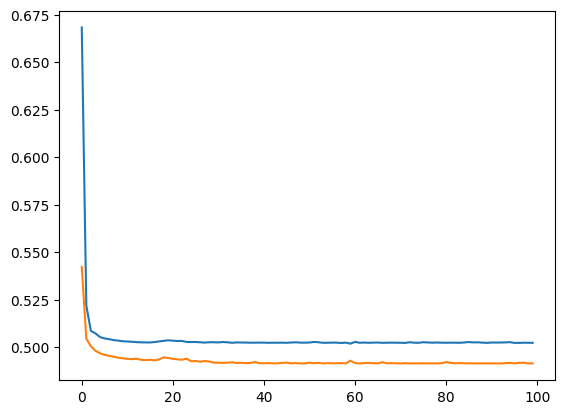

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

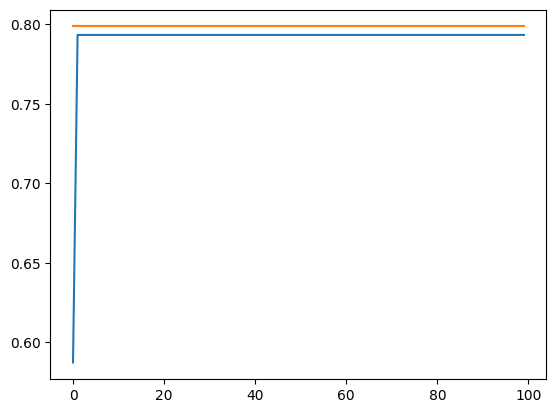

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7934 - loss: 0.4951 - val_accuracy: 0.7987 - val_loss: 0.4646
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.4643 - val_accuracy: 0.7987 - val_loss: 0.4412
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7998 - loss: 0.4452 - val_accuracy: 0.8250 - val_loss: 0.4286
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8116 - loss: 0.4361 - val_accuracy: 0.8238 - val_loss: 0.4222
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.4319 - val_accuracy: 0.8238 - val_loss: 0.4194
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.4294 - val_accuracy: 0.8250 - val_loss: 0.4175
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8147 - loss: 0.4274 - val_accuracy: 0.8256 - val_loss: 0.4155
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8153 - loss: 0.4256 - val_accu

In [36]:
y_pred = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [37]:
y_pred

array([[0.05138502],
       [0.031108  ],
       [0.16717488],
       ...,
       [0.79545194],
       [0.12499979],
       [0.3334256 ]], shape=(2000, 1), dtype=float32)

In [38]:
y_pred = y_pred.argmax(axis = 1)

In [39]:
accuracy_score(y_test, y_pred)

0.8035

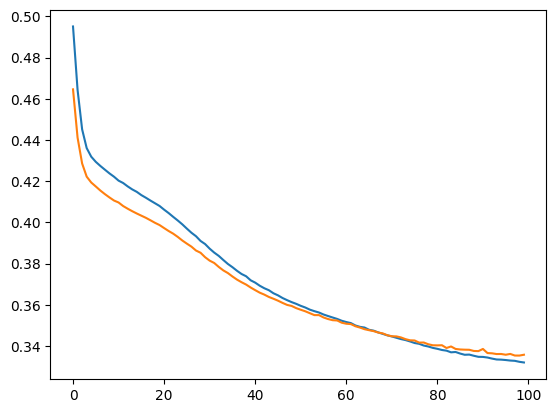

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

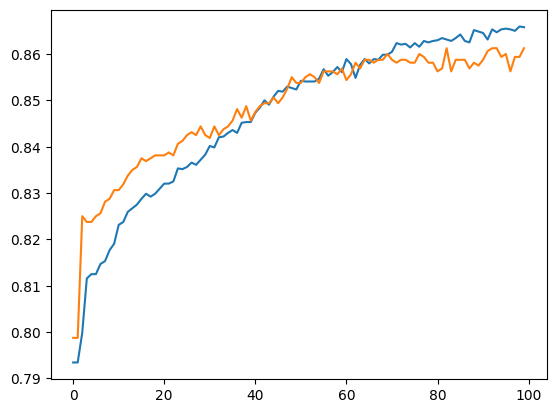

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])